In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np

# data without None Values
video_games = pd.read_csv('processed_video_games_data.csv')

In [2]:
np.random.seed(42)

In [3]:
X = video_games.drop(columns=["Global_Sales"])
y = video_games["Global_Sales"]

In [4]:
m = len(video_games)
split_train = int(m * 0.7)
split_val = int(m * 0.15 + split_train)
split_test = int(m * 0.15 + split_val)


X_train, y_train = X[:split_train], y[:split_train]
X_val, y_val = X[split_train:split_val], y[split_train:split_val]
X_test, y_test = X[split_val:split_test], y[split_val:split_test]

In [5]:
len(X_train)

4777

## stratifying data set

In [6]:
video_games["Global_Sales_cat"] = pd.cut(video_games["Global_Sales"], 
                                         bins =[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,20,30,np.inf], 
                                         labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])

In [7]:
video_games["Global_Sales_cat"].value_counts()


Global_Sales_cat
1     1601
11    1267
2     1146
3      739
4      510
5      408
6      358
7      243
8      204
9      166
10     143
12      27
13      10
14       3
Name: count, dtype: int64

<Axes: >

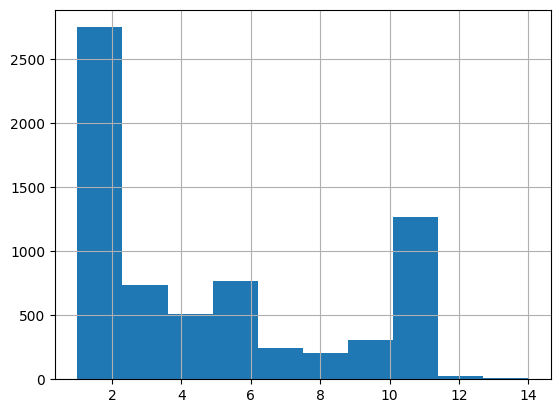

In [8]:
video_games["Global_Sales_cat"].hist()

In [9]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(video_games, video_games["Global_Sales_cat"]):
    strat_train_set = video_games.loc[train_index]
    strat_test_set = video_games.loc[test_index]

In [11]:
strat_test_set["Global_Sales_cat"].value_counts() / len(strat_test_set)


Global_Sales_cat
1     0.234432
11    0.185348
2     0.167766
3     0.108425
4     0.074725
5     0.060073
6     0.052747
7     0.035165
8     0.030037
9     0.024176
10    0.021245
12    0.003663
13    0.001465
14    0.000733
Name: count, dtype: float64

In [12]:
video_games["Global_Sales_cat"].value_counts() / len(video_games)


Global_Sales_cat
1     0.234579
11    0.185641
2     0.167912
3     0.108278
4     0.074725
5     0.059780
6     0.052454
7     0.035604
8     0.029890
9     0.024322
10    0.020952
12    0.003956
13    0.001465
14    0.000440
Name: count, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
def income_cat_proportions(data):
    return data["Global_Sales_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(video_games, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(video_games),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [15]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Global_Sales_cat,,,,,
1,0.234579,0.234432,0.237363,1.186758,-0.062461
2,0.167912,0.167766,0.153846,-8.376963,-0.087260
3,0.108278,0.108425,0.101099,-6.630582,0.135318
4,0.074725,0.074725,0.084982,13.725490,0.000000
5,0.059780,0.060073,0.054945,-8.088235,0.490196
6,0.052454,0.052747,0.057875,10.335196,0.558659
7,0.035604,0.035165,0.027106,-23.868313,-1.234568
8,0.029890,0.030037,0.029304,-1.960784,0.490196
9,0.024322,0.024176,0.030037,23.493976,-0.602410


In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Global_Sales_cat", axis=1, inplace=True)

## Preparing data for ML Algorithms 

In [17]:
video_games_features = strat_train_set.drop(columns=["Global_Sales"])
video_games_labels = strat_train_set["Global_Sales"]

## removing of text attributes 

In [18]:
video_games_features_numerical = video_games_features.drop(columns=["Name","Platform","Genre","Publisher","Developer","Rating"])

In [19]:
video_games_features_numerical

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
3156,2008.0,88.0,25.0,7.7,41.0
2163,2008.0,45.0,43.0,5.9,52.0
4310,2010.0,39.0,5.0,5.6,13.0
4817,2011.0,35.0,11.0,4.7,7.0
357,2001.0,89.0,22.0,8.6,39.0
...,...,...,...,...,...
524,2011.0,86.0,66.0,8.3,382.0
939,2006.0,79.0,76.0,7.1,187.0
2810,2007.0,73.0,37.0,7.6,82.0
3504,2002.0,76.0,22.0,8.9,15.0


In [20]:
video_games_features

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
3156,NHL 09,PS3,2008.0,Sports,Electronic Arts,88.0,25.0,7.7,41.0,EA Canada,E10+
2163,Iron Man,X360,2008.0,Action,Sega,45.0,43.0,5.9,52.0,Secret Level,T
4310,CSI: Fatal Conspiracy,PS3,2010.0,Adventure,Ubisoft,39.0,5.0,5.6,13.0,Telltale Games,M
4817,NCIS,X360,2011.0,Adventure,Ubisoft,35.0,11.0,4.7,7.0,Ubisoft,T
357,NBA Street,PS2,2001.0,Sports,Electronic Arts,89.0,22.0,8.6,39.0,NuFX,E
...,...,...,...,...,...,...,...,...,...,...,...
524,Mortal Kombat,X360,2011.0,Fighting,Warner Bros. Interactive Entertainment,86.0,66.0,8.3,382.0,NetherRealm Studios,M
939,Lost Planet: Extreme Condition,X360,2006.0,Shooter,Capcom,79.0,76.0,7.1,187.0,Capcom,T
2810,Medal of Honor Heroes 2,Wii,2007.0,Shooter,Electronic Arts,73.0,37.0,7.6,82.0,EA Canada,T
3504,NFL Blitz 20-02,PS2,2002.0,Sports,Midway Games,76.0,22.0,8.9,15.0,Midway,E


## Getting Categorical data 

In [21]:
video_games_cat = video_games_features[["Name","Platform","Genre","Publisher","Developer","Rating"]]

In [22]:
video_games_cat.head()

,Name,Platform,Genre,Publisher,Developer,Rating
3156,NHL 09,PS3,Sports,Electronic Arts,EA Canada,E10+
2163,Iron Man,X360,Action,Sega,Secret Level,T
4310,CSI: Fatal Conspiracy,PS3,Adventure,Ubisoft,Telltale Games,M
4817,NCIS,X360,Adventure,Ubisoft,Ubisoft,T
357,NBA Street,PS2,Sports,Electronic Arts,NuFX,E


## Using OneHotEncoder

In [23]:
from sklearn.preprocessing import OneHotEncoder


In [24]:
cat_encoder = OneHotEncoder()
video_games_1hot = cat_encoder.fit_transform(video_games_cat)
video_games_1hot

<5460x5231 sparse matrix of type '<class 'numpy.float64'>'
	with 32760 stored elements in Compressed Sparse Row format>

In [25]:
video_games_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [26]:
#Use This to see all categories:
#cat_encoder.categories_


## Creating a customtransfomer for Critic_Score and Critic_Raiting

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin


In [28]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        X['Critic_Score_And_Count'] = X["Critic_Score"] + X["Critic_Count"]

        return np.c_[X]


In [29]:
attr_adder = CombinedAttributesAdder()


In [30]:
video_games_extra_features = attr_adder.transform(video_games_features)

In [31]:
video_games_extra_features

array([['NHL 09', 'PS3', 2008.0, ..., 'EA Canada', 'E10+', 113.0],
       ['Iron Man', 'X360', 2008.0, ..., 'Secret Level', 'T', 88.0],
       ['CSI: Fatal Conspiracy', 'PS3', 2010.0, ..., 'Telltale Games',
        'M', 44.0],
       ...,
       ['Medal of Honor Heroes 2', 'Wii', 2007.0, ..., 'EA Canada', 'T',
        110.0],
       ['NFL Blitz 20-02', 'PS2', 2002.0, ..., 'Midway', 'E', 98.0],
       ['Ninja Gaiden Black', 'XB', 2005.0, ..., 'Team Ninja', 'M',
        126.0]], dtype=object)

## Creating Pipelines

## Pipeline for numerical data

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

video_games_features_numerical_tr = num_pipeline.fit_transform(video_games_features_numerical)

In [39]:
video_games_features_numerical_tr

array([[ 0.13192836,  1.27420397, -0.21110211,  0.35718339, -0.22460299,
         0.48694011],
       [ 0.13192836, -1.81987908,  0.71880311, -0.88574348, -0.20643219,
        -0.40672619],
       [ 0.60707929, -2.25161159, -1.24433013, -1.09289796, -0.27085593,
        -1.97957889],
       ...,
       [-0.10564711,  0.19487267,  0.4088347 ,  0.2881319 , -0.15687547,
         0.37970015],
       [-1.29352446,  0.41073893, -0.36608631,  1.1858013 , -0.26755215,
        -0.04925967],
       [-0.58079805,  1.70593648,  0.1505277 ,  1.04769832, -0.09245173,
         0.95164659]])

## Pipeline for Categorical Data and nnumerical data

In [40]:
from sklearn.compose import ColumnTransformer

num_attribs = list(video_games_features_numerical)
cat_attribs = list(video_games_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

video_games_features_prepared = full_pipeline.fit_transform(video_games_features)

In [41]:
video_games_features_prepared.toarray()

array([[ 0.13192836,  1.27420397, -0.21110211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.13192836, -1.81987908,  0.71880311, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.60707929, -2.25161159, -1.24433013, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.10564711,  0.19487267,  0.4088347 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.29352446,  0.41073893, -0.36608631, ...,  0.        ,
         0.        ,  0.        ],
       [-0.58079805,  1.70593648,  0.1505277 , ...,  1.        ,
         0.        ,  0.        ]])

In [42]:
video_games_features_prepared.shape

(5460, 5237)

## Model Creation

In [43]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(video_games_features_prepared, video_games_labels)

LinearRegression()

In [44]:
some_data = video_games_features.iloc[:5]
some_labels = video_games_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))


Predictions: [1.22644866 0.81623724 0.19617964 0.13988337 2.78996586]


In [45]:
print("Labels:", list(some_labels))


Labels: [0.33, 0.57, 0.18, 0.14, 2.79]


In [46]:
some_data_prepared.toarray()


array([[ 0.13192836,  1.27420397, -0.21110211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.13192836, -1.81987908,  0.71880311, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.60707929, -2.25161159, -1.24433013, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.84465476, -2.53943327, -0.93436173, ...,  0.        ,
         0.        ,  1.        ],
       [-1.53109992,  1.34615938, -0.36608631, ...,  0.        ,
         0.        ,  0.        ]])

In [47]:
from sklearn.metrics import mean_squared_error

video_games_predictions = lin_reg.predict(video_games_features_prepared)
lin_mse = mean_squared_error(video_games_labels, video_games_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.45864009954140983

In [48]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(video_games_labels, video_games_predictions)
lin_mae

0.15983248028531016

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(video_games_features_prepared, video_games_labels)

DecisionTreeRegressor(random_state=42)

In [50]:
video_games_predictions = tree_reg.predict(video_games_features_prepared)
tree_mse = mean_squared_error(video_games_labels, video_games_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.02440219319993662

## Evalution using Cross-validation

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, video_games_features_prepared, video_games_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [3.50533711 2.19650663 1.08912902 1.88586068 2.17532756 0.97083854
 1.25871875 1.18553679 1.17078486 1.47307048]
Mean: 1.6911110422833182
Standard deviation: 0.739003266703581


In [53]:
lin_scores = cross_val_score(lin_reg, video_games_features_prepared, video_games_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.50826351 2.16595247 1.27522913 1.81725757 1.80000186 1.77047191
 1.45284047 1.45049021 1.20813675 1.6290071 ]
Mean: 1.807765098057023
Standard deviation: 0.6285104740284633


In [55]:
scores = cross_val_score(lin_reg, video_games_features_prepared, video_games_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      1.807765
std       0.662508
min       1.208137
25%       1.451078
50%       1.699740
75%       1.812944
max       3.508264
dtype: float64

In [56]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(video_games_features_prepared, video_games_labels)
video_games_predictions = svm_reg.predict(video_games_features_prepared)
svm_mse = mean_squared_error(video_games_labels, video_games_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

1.5788150251227682

## Neural netowrk model

In [57]:
#pip install tensorflow-macos

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics


In [59]:
video_games_features_prepared.shape

(5460, 5237)

In [60]:
input_shape = (5237,)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5000, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(units=1000, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


In [61]:
epochs = 1_000


In [62]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.MeanSquaredError()]
)

In [63]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              26190000  
                                                                 
 dense_1 (Dense)             (None, 1000)              5001000   
                                                                 
 dense_2 (Dense)             (None, 100)               100100    
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 31,291,201
Trainable params: 31,291,201
Non-trainable params: 0
_________________________________________________________________


In [64]:
pip install timer4

Note: you may need to restart the kernel to use updated packages.


In [65]:
import time
from timer import Timer

In [66]:
video_games_features_prepared

<5460x5237 sparse matrix of type '<class 'numpy.float64'>'
	with 65520 stored elements in Compressed Sparse Row format>

In [67]:
history = model.fit(np.array(video_games_features_prepared.toarray()), video_games_labels, epochs=300,
                    )

Epoch 1/300


2023-04-17 13:55:48.838702: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


171/171 [==============================] - 5s 29ms/step - loss: -18021.2051 - mean_squared_error: 3.7861
Epoch 2/300
171/171 [==============================] - 5s 27ms/step - loss: -744620.1250 - mean_squared_error: 3.8004
Epoch 3/300
171/171 [==============================] - 5s 27ms/step - loss: -5263906.0000 - mean_squared_error: 3.7919
Epoch 4/300
171/171 [==============================] - 5s 27ms/step - loss: -22247992.0000 - mean_squared_error: 3.7901
Epoch 5/300
171/171 [==============================] - 5s 27ms/step - loss: -61299884.0000 - mean_squared_error: 3.7930
Epoch 6/300
171/171 [==============================] - 5s 28ms/step - loss: -136001408.0000 - mean_squared_error: 3.7955
Epoch 7/300
171/171 [==============================] - 5s 28ms/step - loss: -269360096.0000 - mean_squared_error: 3.7881
Epoch 8/300
171/171 [==============================] - 5s 29ms/step - loss: -478343840.0000 - mean_squared_error: 3.7910
Epoch 9/300
171/171 [==============================] - 

In [68]:
model.evaluate(video_games_features_prepared.toarray(), video_games_labels)


171/171 [==============================] - 1s 8ms/step - loss: -113827353985024.0000 - mean_squared_error: 3.7476


[-113827353985024.0, 3.7476136684417725]

In [69]:
import matplotlib.pyplot as plt

In [70]:
plt.plot([i for i in range(epochs)], history['loss'])


TypeError: 'History' object is not subscriptable

## insanly low, trying to only use numerical values to see if it has anything to do with the absurd amount of parametters

In [ ]:
video_games_features_numerical_tr.shape

In [ ]:
input_shape = (6,)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5000, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(units=1000, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.MeanSquaredError()]
)

In [ ]:
history = model.fit(video_games_features_numerical_tr, video_games_labels, epochs=30,
                    )

In [ ]:
model.evaluate(video_games_features_numerical_tr, video_games_labels)


In [ ]:
from tensorflow.keras import regularizers


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=input_shape),
    tf.keras.layers.Dense(units=1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
   metrics=[metrics.MeanSquaredError()]
)

In [ ]:
history = model.fit(video_games_features_numerical_tr, video_games_labels, epochs=30,
                    )